In [1]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

TRABAJO 1 FMPS - DAVID QUIJADA HERNÁNDEZ
------------

Representación discreta del intervalo temporal $[-\pi,\pi]$
------------------

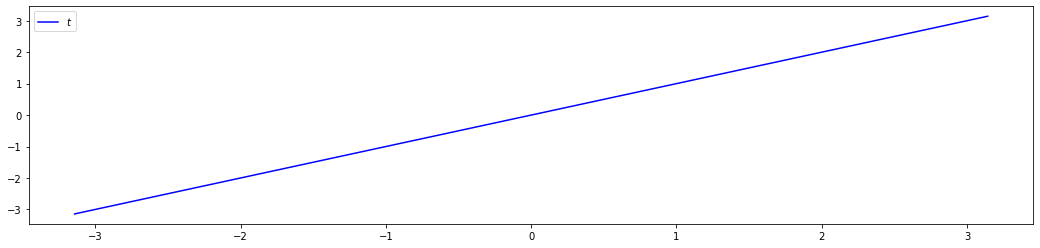

In [2]:
N = 2**10 + 1 #Esto con el fin de que sean 1025, es decir, un número par sumado al punto 0 que está en el medio.
L = np.pi
w0 = 2
t = np.linspace(-L, L, N) #Describe la cantidad de elementos que se van a tomar como vector con los límites entre pi y -pi
w = np.copy(t)
omega = np.copy(t)

fig, ax = plt.subplots(1,1,figsize=(18,4))
o1 = ax.plot(t, t,'b-', label='$t$')
ax.legend()

Ejercicio 1 - Transformada de Fourier y Representación Frecuencial.
------------------
Usando las propiedades de la transformada de Fourier calcule la transformada de las siguientes señales. Grafique la señal x y el módulo de su transformada. $|\hat{x}|$:

1.- $x(t) = 2sin(\omega_{0}t)$

Notemos que:
\begin{equation}
sin(\omega_{0}t) = \frac{e^{i\omega_{0}t}-e^{-i\omega_{0}t}}{2i} 
\end{equation}

Por lo tanto:

\begin{eqnarray}
x(t) &=& 2sin(\omega_{0}t)\\
     &=& 2(\frac{e^{i\omega_{0}t}-e^{-i\omega_{0}t}}{2i}) \\
     &=& i(e^{-i\omega_{0}t}-e^{i\omega_{0}t}) \\
\end{eqnarray}

Luego, la definición del delta de Dirac es la siguiente: 

\begin{equation}
\delta(\omega) = \frac{1}{2\pi}\int_{-\infty}^{\infty}e^{i\omega t}dt
\end{equation}

De esta forma:

\begin{eqnarray*}
\hat{x}(t) &=& i[\frac{1}{2\pi}(\int_{-\infty}^{\infty}(e^{i\omega_{0}t}-e^{-i\omega_{0}t})e^{-i\omega t}dt)] \\
           &=& i[\frac{1}{2\pi}\int_{-\infty}^{\infty}e^{it(\omega_{0}-\omega)t}dt - \frac{1}{2\pi}\int_{-\infty}^{\infty}e^{i[-(\omega_{0}+\omega)]t}dt] \\
\end{eqnarray*}

Finalmente, usando que $\delta (\omega) = \delta (-\omega)$, se tiene que:

\begin{equation}
\hat{x}(t) = i(\delta (\omega - \omega_{0}) - \delta (\omega + \omega_{0}))
\end{equation}

Luego, el módulo de esta transformada será:

\begin{equation}
|\hat{x}(t)| = \delta(\omega - \omega_{0}) + \delta(\omega + \omega_{0})
\end{equation}

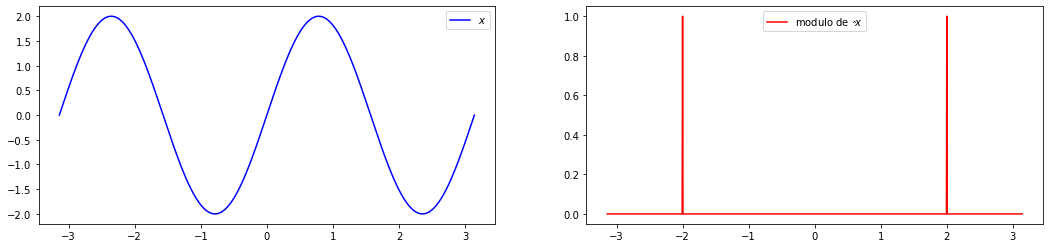

In [3]:
x = 2*np.sin(w0*t)
n_w0 = int((L+w0)*N/(2*L))
minus_n_w0 = int((L-w0)*N/(2*L))
xhatmod = signal.unit_impulse(N, n_w0) + signal.unit_impulse(N, minus_n_w0)

fig, ax = plt.subplots(1, 2, figsize=(18,4))
o1 = ax[0].plot(t, x, 'b-', label='$x$')
o2 = ax[1].plot(w, xhatmod, 'r-', label='modulo de $\hat x$')
ax[0].legend()
ax[1].legend()


2.- $x(t) = 2sin(2\omega_{0}t + \frac{2}{3})$

Calculando la transformada de Fourier se tiene que:

\begin{eqnarray}
\hat{x}(t) &=& 2\mathscr{F}(sin(\omega_{0}t+\frac{2}{3}))(\omega) \\
           &=& 2e^{-i\frac{2}{3}t}\mathscr{F}sin(\omega_{0}t)(\omega) \\
           &=& 2e^{-i\frac{2}{3}t}i(\delta(\omega - \omega_{0}) - \delta(\omega + \omega_{0}))\\ 
           &=& 2(cos(\frac{2}{3}t)i + sin(\frac{2}{3}t))i(\delta(\omega - \omega_{0}) - \delta(\omega + \omega_{0})) \\
\end{eqnarray}

Por último:

\begin{equation}
|\hat{x}(t)| = 2(\delta(\omega + \omega_{0}) + \delta(\omega - \omega_{0}))
\end{equation}

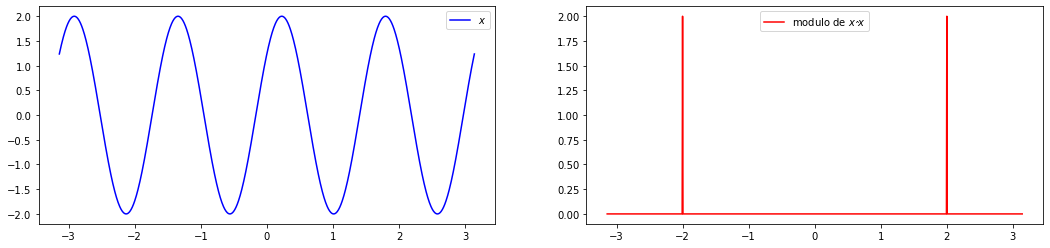

In [4]:
x = 2*np.sin(2*w0*t+2/3)
m_w0 = int((L+w0) * N/(2*L))
minus_m_w0 = int((L-w0) * N/(2*L))
xhatmod = 2*signal.unit_impulse(N, minus_m_w0) + 2*signal.unit_impulse(N, m_w0)

fig, ax = plt.subplots(1, 2,figsize=(18,4))
o1 = ax[0].plot(t, x, 'b-',  label='$x$')
o2 = ax[1].plot(w, xhatmod, 'r-', label='modulo de $x\hat x$')
ax[0].legend()
ax[1].legend()

1.3 $x(t) = 2cos(\omega_{0}t)+sin(\omega_{0}t)$
    
\begin{eqnarray}
\hat{x}(t) &=& 2\mathscr{F}(cos(\omega_{0}t))(\omega) + \mathscr{F}(sin(\omega_{0}t))(\omega) \\
           &=& 2(\frac{1}{2\pi})\int_{-\infty}^{\infty}cos(\omega_{0}t)e^{-i\omega t}dt + i(\delta(\omega-\omega_{0})-\delta(\omega+\omega_{0}) \\
           &=& 2(\frac{1}{2})[\frac{1}{2\pi}(\int_{-\infty}^{\infty}e^{-it(\omega-\omega_{0})} - e^{-it(\omega + \omega_{0})}dt)] + i(\delta(\omega - \omega_{0}) - \delta(\omega + \omega_{0}) \\
           &=& 2(\frac{1}{2})[\delta(\omega - \omega_{0})-\delta(\omega + \omega_{0})] + i[\delta(\omega - \omega_{0}) - \delta(\omega + \omega_{0})] \\
           &=& [\delta(\omega - \omega_{0})-\delta(\omega + \omega_{0})] + i[\delta(\omega - \omega_{0}) - \delta(\omega + \omega_{0})] \\
\end{eqnarray}
    
Finalmente, su módulo será:
    
\begin{equation}
|\hat{x}(t)| =  \sqrt{2}[\delta(\omega - \omega_{0}) + \delta(\omega+\omega_{0})]
\end{equation}

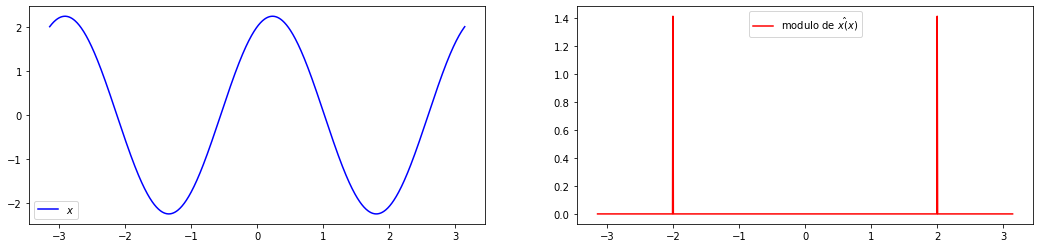

In [5]:
x = 2*np.cos(w0*t) + np.sin(w0*t)
n_w0 = int((L+w0) * N/(2*L))
minus_n_w0 = int((L-w0) * N/(2*L))
xhatmod = np.sqrt(2)*signal.unit_impulse(N, n_w0)+np.sqrt(2)*signal.unit_impulse(N, minus_n_w0)

fig, ax = plt.subplots(1, 2,figsize=(18,4))
o1 = ax[0].plot(t, x, 'b-',  label='$x$')
o2 = ax[1].plot(w, xhatmod, 'r-', label='modulo de $x\hat(x)$')
ax[0].legend()
ax[1].legend()

1.4 $x(t)=1$

Es claro que: 
    
\begin{equation}
\hat{x}(t) = \delta(\omega)
\end{equation}

finalmente:

\begin{equation}
|\hat{x}(t)| = \delta(\omega)
\end{equation}

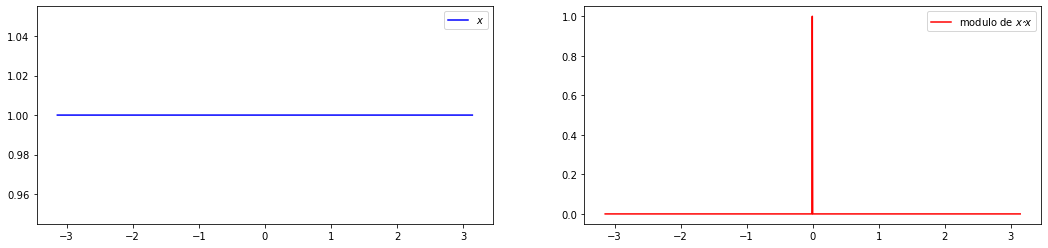

In [6]:
x = t**0
n_w0 = int((L+w0) * N/(2*L))
minus_n_w0 = int((L-w0) * N/(2*L))
xhatmod = signal.unit_impulse(N, int(N/2)-1)

fig, ax = plt.subplots(1, 2,figsize=(18,4))
o1 = ax[0].plot(t, x, 'b-',  label='$x$')
o2 = ax[1].plot(w, xhatmod, 'r-', label='modulo de $x\hat x$')
ax[0].legend()
ax[1].legend()


EJERCICIO - CALCULO DE LA TRANSFORMADA DE FOURIER
-------------
Para las siguientes señales, grafique la señal, calcule la transformada de Fourier de las siguientes señales y grafique su módulo. Cuando sea posible intente no calcular directamente la transformada.

2.1 $x(t) = e^{-at}\gamma(t) \quad $ con $a>0$, sabiendo que:

$$ \gamma (t) = \left \{
    \begin{aligned}
      1 &,\ \text{si} \ t > 0\\
      \frac{1}{2} &,\ \text{si} \ t=0 \\
      0 &,\ \text{e.o.c} \
    \end{aligned}
  \right .$$

\begin{eqnarray}
  \hat x(\omega) &=& \int_0^\infty e^{-at} e^{-i \omega t} dt  \\
                 &=& \int_0^\infty e^{-(a +i \omega) t} dt \\
                 &=& \left[ \frac{e^{-(a +i \omega) t}}{-(a +i \omega)} \right]_0^\infty \\
                 &=&  \frac{1}{(a +i \omega)}
\end{eqnarray}  

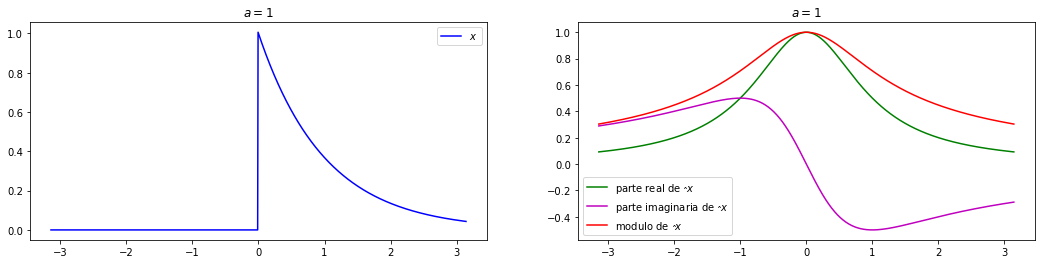

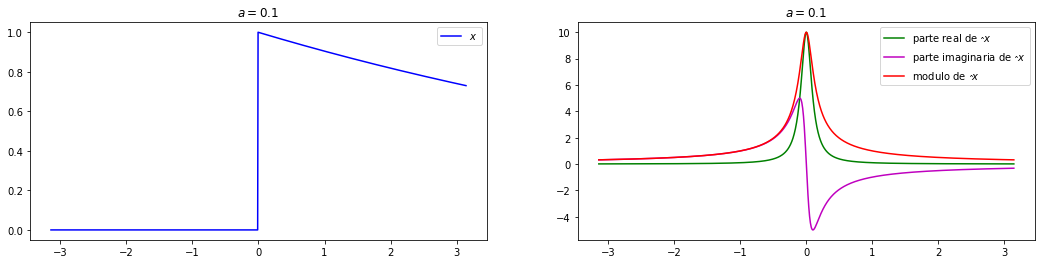

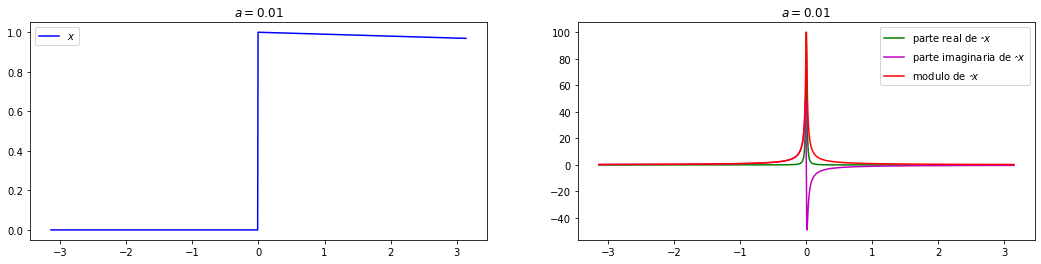

In [7]:
for a in [1, .1, .01]:  
    
    x = np.exp(-a*t) 
    x[:int(N/2)-1] = 0
    xhat = 1/(a+1j*omega)

    fig, ax = plt.subplots(1,2,figsize=(18,4))
    o1 = ax[0].plot(t, x, 'b-', label='$x$')
    o2 = ax[1].plot(w, np.real(xhat), 'g-', label='parte real de $\hat x$')
    o2 = ax[1].plot(w, np.imag(xhat), 'm-', label='parte imaginaria de $\hat x$')
    o2 = ax[1].plot(w, np.abs(xhat), 'r-', label='modulo de $\hat x$')
    ax[0].legend()
    ax[1].legend()
    ax[0].set_title(f'$a = {a}$')
    ax[1].set_title(f'$a = {a}$')

2.2) $x(t) = e^{-a|t|} \quad $, con a>0

\begin{eqnarray}
\hat{x}(t) &=& \frac{1}{2\pi}\int_{-\infty}^{\infty}e^{-a|t|}e^{-i\omega t}dt \\
           &=& \frac{1}{2\pi}[\int_{-\infty}^{0}e^{at-i\omega t}dt + \int_{0}^{\infty}e^{-(a+i\omega)t}dt]\\
           &=& \frac{1}{2\pi}[\frac{1}{(a-i\omega)}+\frac{1}{(a+i\omega)}] \\
           &=& \frac{a}{\pi(a^{2}+\omega^{2})}\\
\end{eqnarray}

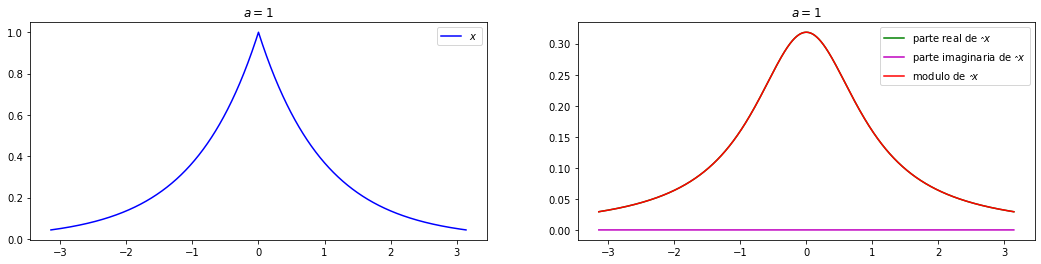

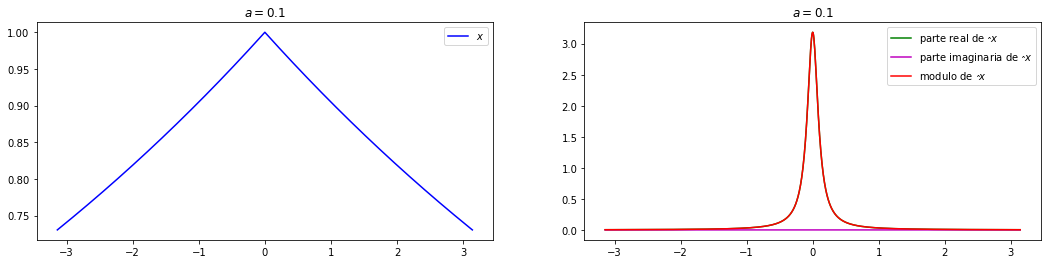

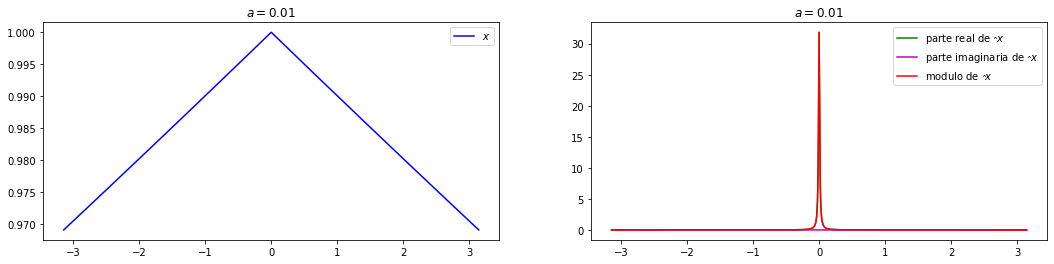

In [8]:
for a in [1, .1, .01]:
    
    x = np.exp(-a*np.absolute(t))
    xhat = a/(np.pi*(a**2+omega**2))

    fig, ax = plt.subplots(1,2,figsize=(18,4))
    o1 = ax[0].plot(t, x, 'b-', label='$x$')
    o2 = ax[1].plot(w, np.real(xhat), 'g-', label='parte real de $\hat x$')
    o2 = ax[1].plot(w, np.imag(xhat), 'm-', label='parte imaginaria de $\hat x$')
    o2 = ax[1].plot(w, np.abs(xhat), 'r-', label='modulo de $\hat x$')
    ax[0].legend()
    ax[1].legend()
    ax[0].set_title(f'$a = {a}$')
    ax[1].set_title(f'$a = {a}$')

Cabe destacar, que en este ejercicio en particular tanto la parte real como el módulo son iguales.

2.3) $x(t) = \frac{1}{(1+t^{2})}$

Usando propiedades de dualidad en la transformada de Fourier, se tiene que: 

$$ \mathscr{F}(g(t))(\omega) = f(\omega) $$

Del ejercicio anterior, se sabe que:

$$ \mathscr{F}(e^{-a|t|})(\omega) = \frac{a}{\pi(1+\omega^{2})} $$

y además, por dualidad se tiene que:

\begin{eqnarray}
\mathscr{F}(\frac{1}{\pi(1+\omega^{2})}) = 2\pi e^{-|w|} = 2\pi e^{-|w|}
\end{eqnarray}

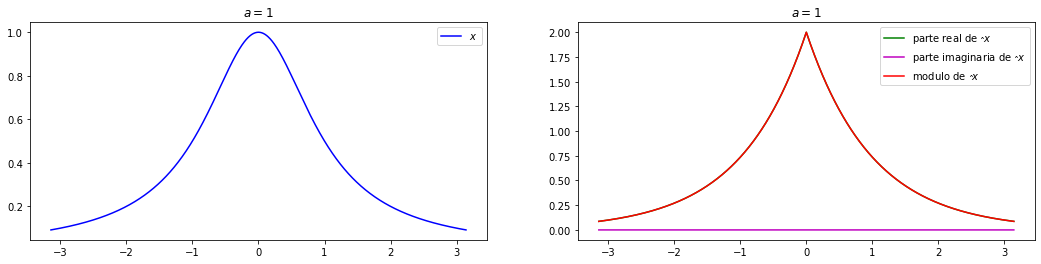

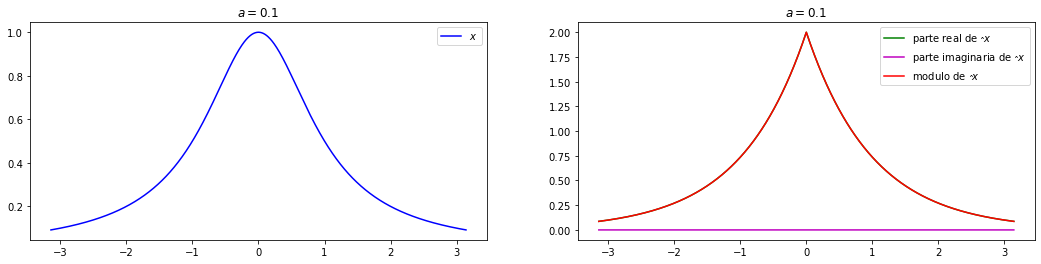

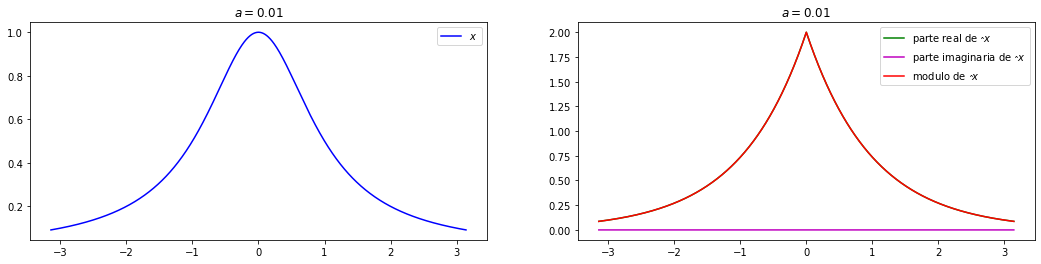

In [9]:
for a in [1, .1, .01]:
    
    x = 1/(1+t*t)
    xhat = 2*np.exp(-np.abs(omega))

    fig, ax = plt.subplots(1,2,figsize=(18,4))
    o1 = ax[0].plot(t, x, 'b-', label='$x$')
    o2 = ax[1].plot(w, np.real(xhat), 'g-', label='parte real de $\hat x$')
    o2 = ax[1].plot(w, np.imag(xhat), 'm-', label='parte imaginaria de $\hat x$')
    o2 = ax[1].plot(w, np.abs(xhat), 'r-', label='modulo de $\hat x$')
    ax[0].legend()
    ax[1].legend()
    ax[0].set_title(f'$a = {a}$')
    ax[1].set_title(f'$a = {a}$')

2.4) $x(t) = \frac{1}{2-2t+t^{2}}$

Notemos primero que: $\frac{1}{2-2t+t^{2}} = \frac{1}{1+(t-1)^{2}}$

Luego, usando la propiedad de dualidad, se tiene que:

$$ \mathscr{F} ( \frac{1}{\pi ( 1+ (t-1)^{2} )})(\omega ) = \mathscr{F}(\frac{1}{1+(t-1)^{2}})( \omega ) = 2\pi e^{-|\omega - 1|} $$

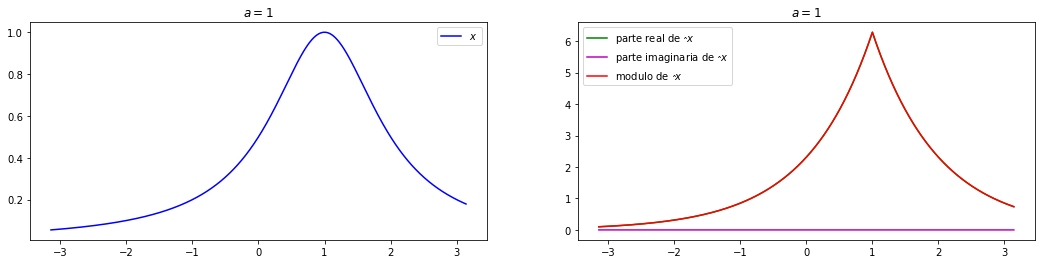

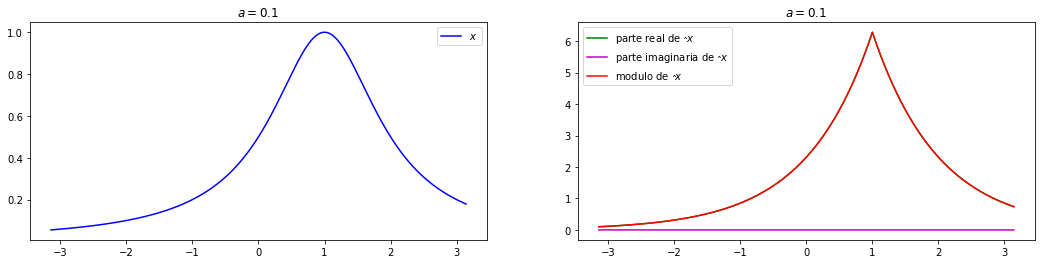

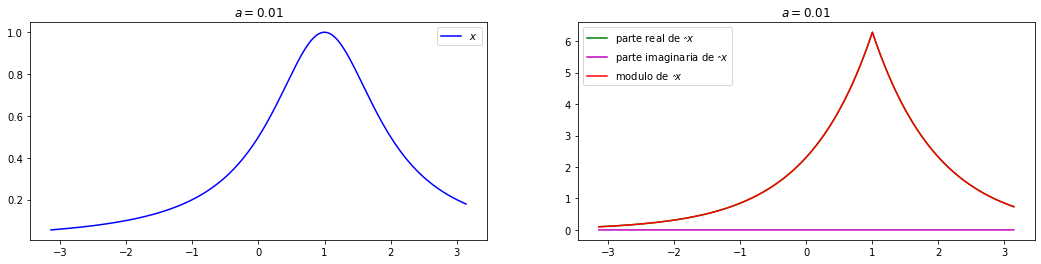

In [10]:
for a in [1, .1, .01]:
    
    x = 1/(2-2*t+t*t)
    xhat = 2*np.pi*np.exp(-np.abs(omega - 1))

    fig, ax = plt.subplots(1,2,figsize=(18,4))
    o1 = ax[0].plot(t, x, 'b-', label='$x$')
    o2 = ax[1].plot(w, np.real(xhat), 'g-', label='parte real de $\hat x$')
    o2 = ax[1].plot(w, np.imag(xhat), 'm-', label='parte imaginaria de $\hat x$')
    o2 = ax[1].plot(w, np.abs(xhat), 'r-', label='modulo de $\hat x$')
    ax[0].legend()
    ax[1].legend()
    ax[0].set_title(f'$a = {a}$')
    ax[1].set_title(f'$a = {a}$')

2.5) $x(t) = \frac{1}{(1+t^{2})}$

Notemos que: $\frac{1}{(1+t^{2})} = \frac{1}{1+(t \sqrt{t^{2}+2})^{2}}$

Luego:

$$ \mathscr{F}(\frac{1}{(1+(t \sqrt{t^{2}+2})^{2}}) (\omega) = 2\pi e^{-|(t\sqrt{t^{2}+2})|}$$

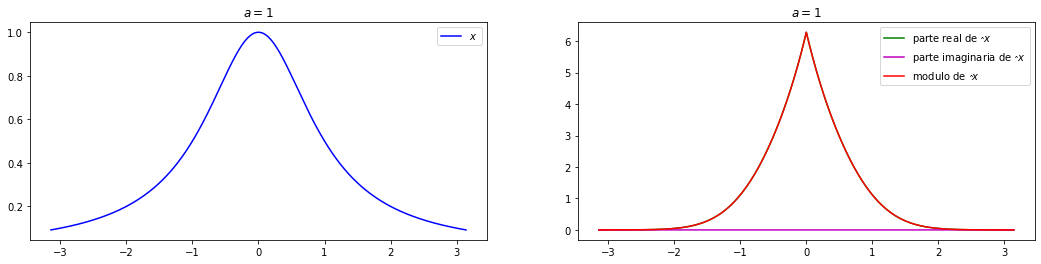

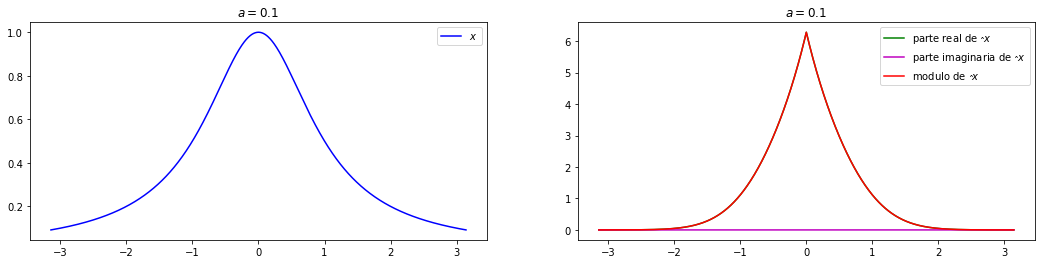

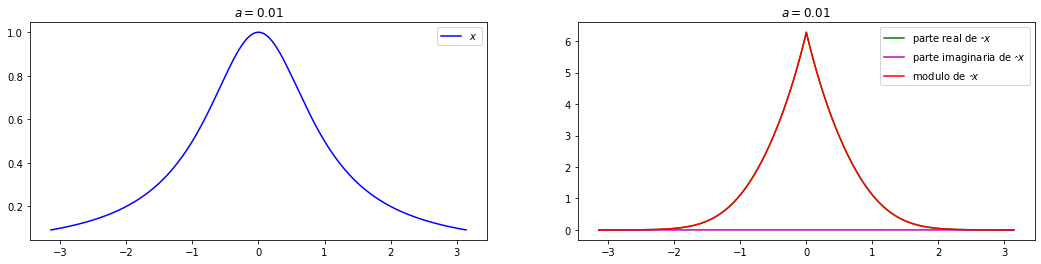

In [11]:
for a in [1, .1, .01]:
    
    x = 1/(1+t*t)
    xhat = 2*np.pi*np.exp(- np.abs(omega*np.sqrt(omega*omega+2)))

    fig, ax = plt.subplots(1,2,figsize=(18,4))
    o1 = ax[0].plot(t, x, 'b-', label='$x$')
    o2 = ax[1].plot(w, np.real(xhat), 'g-', label='parte real de $\hat x$')
    o2 = ax[1].plot(w, np.imag(xhat), 'm-', label='parte imaginaria de $\hat x$')
    o2 = ax[1].plot(w, np.abs(xhat), 'r-', label='modulo de $\hat x$')
    ax[0].legend()
    ax[1].legend()
    ax[0].set_title(f'$a = {a}$')
    ax[1].set_title(f'$a = {a}$')

EJERCICIO 3 - FILTRO MEDIO
------------------

1.- El filtro medio, parametrizado por $T>0$, calcula el promedio de la señal en una ventana deslizante de largo $T$. Su respuesta impulsional es la función rectangular definida por:

$$h(t) = \Pi _{T}(t-T/2)$$

En donde

 $$ \Pi _{T} (t) = \left \{
    \begin{aligned}
      \frac{1}{T} &,\ \text{si} \ |t| < \frac{T}{2}\\
      \frac{1}{2T} &,\ \text{si} \ |t|=\frac{T}{2} \\
      0 &,\ \text{otherwise} \
    \end{aligned}
  \right .$$
  
Grafique la respuesta impusional y determine si es causal.

Primero notemos que la respuesta impulsionar es causal desde que podemos expresarla por medio de la siguiente ecuación.

 $$ h(t) = \left \{
    \begin{aligned}
      \frac{1}{T} &,\ \text{si} \ 0<t<T\\
      \frac{1}{2T} &,\ \text{si} \ t = 0 \ \text{v}\ t=T \\
      0 &,\ \text{otherwise} \
    \end{aligned}
  \right .$$

Aquí, consideraremos el intervalo $[-2\pi, 2\pi]$ con $T=\frac{\pi}{2}$ para hacer el gráfico correspondiente.

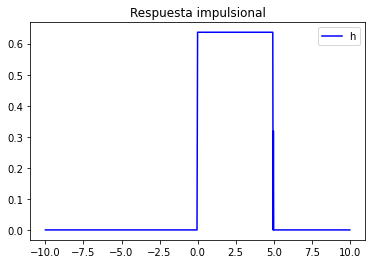

In [17]:
T = np.pi/2


n_zero = int(N/2)-1
n_T = n_zero + int(T * N/(2*L))

h = np.zeros_like(t)
#definimos la función por partes
h[n_zero+1:n_T-1] = 1/T  
h[n_zero] = 1/(2*T)
h[n_T]=1/(2*T)

plt.plot(t,h,'b-',label = 'h')
plt.legend()
plt.title('Respuesta impulsional');


2.- Calcular la salida del sistema lineal correspondiente cuando la entrada es:

2.a) $x(t) = 1$

$$\mathscr{L}[1](t) = \int_{-\infty}^{\infty}1 \cdot h(u)du = \int_{0}^{T} \frac{1}{T}dt = 1$$

2.b) $x(t) = \gamma(t)$

$$ \mathscr{L}[\gamma](t) = \gamma(t) \ast h(t) = \int_{-\infty}^{\infty} \gamma(t-u)h(u)du = \int_{0}^{T}\frac{1}{T}dt = 1$$

2.c) $x(t) = cos(\omega_{0}t)$

\begin{eqnarray}
\mathscr{L}[cos(\omega_{0}t)](t) &=& \int_{-\infty}^{\infty}cos(\omega_{0}(t-u))h(u)du \\
                                 &=& \frac{1}{T}\int_{0}^{T}cos(\omega_{0}(t-u))du \quad\quad\quad v=\omega_{0}(t-u) \Rightarrow dv=-\omega_{0} \\
                                 &=& -\frac{1}{\omega_{0}T}\int_{\omega_{0}t}^{\omega_{0}(t-T)} cos(v)dv \\
                                 &=& \frac{1}{\omega_{0}T}(sin(\omega_{0}t)-sin(\omega_{0}(t-T)))\\
\end{eqnarray}

3.- Expresar la salida del sistema $x(t) = cos(\omega_{0}t)$ de la forma:

$$y(t) = A(\omega_{0})cos(\omega_{0}t + \varphi(\omega_{0}))$$

Usando identidades trigonométricas, se obtiene lo siguiente:

\begin{eqnarray}
\mathscr{L}[cos(\omega_{0}t)](t) = y(t) &=& \frac{2}{\omega_{0}T}cos(\frac{2\omega_{0}t - \omega_{0}T}{2})sin(\frac{\omega_{0}T}{2})\\
                                        &=& sinc(\frac{\omega_{0}T}{2})cos((\omega_{0}t) - \frac{\omega_{0}T}{2}) \\
\end{eqnarray}

Finalmente, basta con asignar valores para encontrar $A(\omega_{0})$ y $\varphi(\omega_{0})$, en este caso:

$$ A(\omega_{0}) = sinc(\frac{w_{0}T}{2}) \quad \wedge \quad \varphi(\omega_{0}) - \frac{\omega_{0}T}{2} $$

4.- Grafique $|A(\omega_{0})|$ en función de $\omega_{0}$ para $T=1$. Grafique también $\varphi(\omega_{0})$.

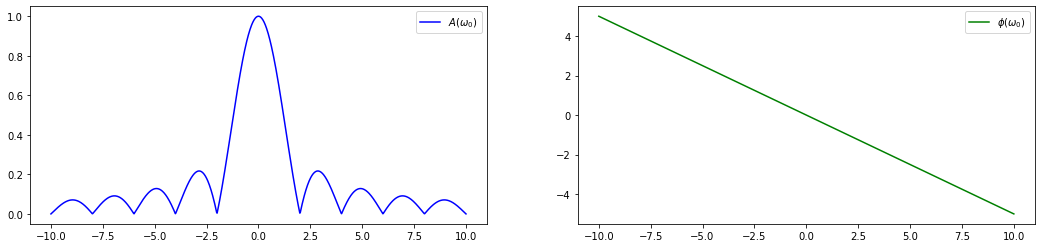

In [13]:
T=1
N = 2**10 + 1
t = np.linspace(-10, 10, N)
w0=np.copy(t)

A= np.sinc(w0*T/2)
varphi = -w0*T/2
fig, ax = plt.subplots(1,2,figsize=(18,4))
o1 = ax[0].plot(w0,np.abs(A),'b-',label = '$A(\omega_0)$')
o2 = ax[1].plot(w0, varphi, 'g-', label='$\phi(\omega_0)$')
ax[0].legend()
ax[1].legend()

5.- Calcule la función de transferencia del sistema $H(\omega)$. ¿Cuál es la relación con $A(\omega)$ y $\varphi(\omega)$?

Para responder esto se debe calcular la transformada de Fourier de la respuesta impulsional. Es decir:

\begin{eqnarray}
H(\omega) &=& \mathscr{F}[h(t)](\omega) \\
          &=& \int_{0}^{T} \frac{1}{T} e^{-i\omega t} dt \\
          &=& \frac{1}{T} \cdot \frac{1}{-i\omega}[e^{-i\omega t}]_{0}^{T} \\
          &=& \frac{1}{i\omega T}(-(e^{-i\omega T} - 1)) \\
          &=& \frac{1}{i\omega T}(1 - e^{-i\omega T}) \\
          &=& \frac{1}{i\omega T}(1 -(cos(\omega T) - isin(\omega T)) \\
          &=& \frac{1 - cos(\omega T)}{i\omega T} + sinc(\omega T) \\
          &=&  sinc(\omega T) - isinc(\frac{\omega T}{2})\\
\end{eqnarray}

EJERCICIO 4 - BODE PLOT
-----------------------

1.- Pruebe que si dos filtros $H_{1}(\omega)$ y $H_{2}(\omega)$ se encuentran conectados en serie (es decir, actúan uno después del otro sobre las señales entrantes), entonces el sistema es equivalente a:

$$ H(\omega) = H_{1}(\omega) \cdot H_{2}(\omega)$$

Y entonces, se tiene que: 

$$G(\omega) = G_{1}(\omega) + G_{2}(\omega)$$
$$\Phi(\omega) = \Phi_{1}(\omega) + \Phi_{2}(\omega)$$

Sea $f \in \mathcal{L}^2(\mathbb{R})$ una señal cualquiera, entonces podemos decir que: 

\begin{eqnarray}
\widehat{\mathscr{L}(f)}(\omega) &=& \widehat{h*f}(\omega) \\
                                &=& \widehat{h_{2}*(h_{1}*f)}(\omega) \\
                                &=& \hat{h_{2}}(\omega)\hat{h_{1}}(\omega)\hat{f}(\omega) \\
                                &=& H_{2} \cdot H_{1} \cdot \hat{f}(\omega)\\
\end{eqnarray}

Por lo tanto, se demuestra lo primero.

Por otro lado, usando $G(\omega)=20 \log_{10} (|H(\omega)|)$ y propiedades de logaritmos, se tiene que: 

\begin{eqnarray}
G(\omega) &=& 20log(|H_{1}(\omega)||H_{2}(\omega)|) \\
          &=& 20log(|H_{1}(\omega)|) + 20log(|H_{2}(\omega)|) \\
          &=& G_{1}(\omega) + G_{2}(\omega) \\
\end{eqnarray}

Luego, considerando que $H(w) = |H(\omega)|e^{i \arg(H(\omega))}$ y también que $\Phi(\omega) = \arg(H(\omega)) = \tan^{-1} \left(\frac{Im(H(\omega))}{Re(H(\omega))}\right)$, entonces: 

\begin{eqnarray}
H_{1}(\omega) &=& |H_{1}(\omega)|e^{iarg(H_{1}(\omega)} \\
              &=& r_{1}[cos(\theta_{1})+isin(\theta_{1})] \\
\end{eqnarray}

Para $H_{2}$, es análogo. Luego operamos ambos, así:

\begin{eqnarray}
H_{1}(\omega)\cdot H_{2}(\omega) &=& r_{1}r_{2}[cos(\theta_{1}) + isin(\theta_{1})][cos(\theta_{2}) + isin(\theta_{2})] \\
                                 &=& r_{1}r_{2}[cos(\theta_{1}+\theta_{2}) + isin(\theta_{1} + \theta_{2}] \\
\end{eqnarray}

Esto nos dice entonces que:

\begin{eqnarray}
\Phi(H(\omega)) &=& \Phi(H_{1}(\omega) \cdot H_{2}(\omega)) \\
                &=& arg((H_{1}(\omega) \cdot H_{2}(\omega)) \\
                &=& \phi_{1} + \phi_{2} \\
                &=& \Phi_{1}(\omega) + \Phi_{2}(\omega) \\
\end{eqnarray}

2.- Pruebe de la misma manera, que si $H(\omega) = \frac{H_{1}(\omega)}{H_{2}(\omega)}$, entonces se tiene que:\\

$$ G(\omega) = G_{1}(\omega) - G_{2}(\omega)$$
$$ \Phi(\omega) = \Phi_{1}(\omega) - \Phi_{2}(\omega)$$

E indique para qué tipo de sistema visto en clases esto es particularmente útil.

Retomando 1.-, el procedimiento para G(\omega) es directo, puesto que esta vez usa las propiedades de logaritmos para la división. Así:

$$G(\omega) = 20log(\frac{H_{1}(\omega)}{H_{2}(\omega)}) = G_{1}(\omega) - G_{2}(\omega) $$

Por otro lado, siguiendo también lo visto en 1.-, ahora dividimos y encontraremos abajo una suma por diferencia en números complejos (debido a la racionalización), lo que nos llevará a un 1. Veámoslo.

\begin{eqnarray}
\frac{H_{1}(\omega)}{H_{2}(\omega)} &=& \frac{r_{1}}{r_{2}} \frac{cos(\theta_{1} + isin(\theta_{1})}{cos(\theta_{2} + isin(\theta_{2})} \cdot \frac{cos(\theta_{2}) - isin(\theta_{2})}{cos(\theta_{2})-isin(\theta_{2})} \\
                                    &=& \frac{r_{1}}{r_{2}} [cos(\theta_{1} - \theta_{2}) + isin(\theta_{1} - \theta_{2})] \\
\end{eqnarray}

Por lo tanto:

\begin{eqnarray}
\Phi(\omega) &=& arg(H(\omega)) \\
             &=& arg(\frac{H_{1}(\omega)}{H_{2}(\omega)}) \\
             &=& \phi_{1} - \phi_{2} \\
             &=& \Phi_{1}(\omega) - \Phi_{2}(\omega) \\
\end{eqnarray}

Ejercicio 4b - Respuesta frecuencial de sistemas eléctricos
--------------

Para el sustema eléctrico dado en la figura 2, calcule la función de transferencia del sistema en función de $\omega_{0} = \frac{1}{RC}$ donde R es el valor de la resistencia y C el valor del capacitador C.

Notemos que, según el modelo, la salida y(t) del sistema en función de la entrada x(t), está dada por:

$$ x(t) = RTy'(t) + y(t) $$

donde:

$$ y(t) = \frac{1}{C}\int_{-\infty}^{t}i(v)dv \quad \wedge \quad x(t) = Ri(t) + y(t)$$

Comenzando aplicando transformada de Fourier a la ecuación diferencial, esto nos dará la función de transferencia. Así.

\begin{eqnarray}
\hat{x}(t) &=& RC \hat{y'}(t) + \hat{y}(t)\\
           &=& (i\omega)RC \hat{y}(t) + \hat{y}(t) \\
           &=& [(iw)RC + 1]\hat{y}(t) \\
\end{eqnarray}

Además, ya sabemos que $H(\omega) = \frac{Y(\omega)}{X(\omega)}$ por lo tanto:

$$H(\omega) = \frac{Y(\omega)}{X(\omega)} = \frac{\hat{x}(t)}{\hat{y}(t)} = \frac{1}{(i\omega)RC + 1} = \frac{1}{i(\frac{\omega}{\omega_{0}}) + 1}$$

Con $\omega_{o} = \frac{1}{RC}$ que es conocido como la frecuencia de corte.

2.- Grafico del diagrama de Bode para el sistema eléctrico
----

Text(0.5, 0, 'Frecuencia (rad/sec)')

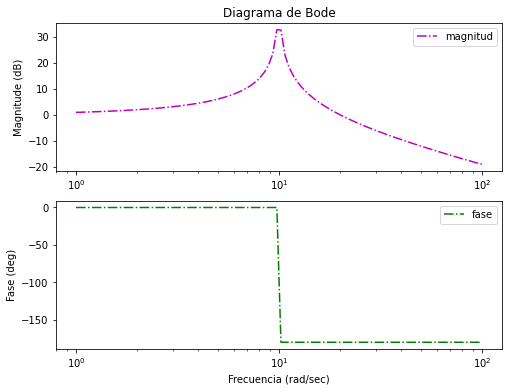

In [14]:
R=0.1 #Valores supuestos, pues en el modelo es una constante
C= 1 #Mismo argumento
w0 = 1/R*C

funtran = signal.TransferFunction([1],[1j/w0,1])
omega, mag, phase = signal.bode(funtran)

fig, ax = plt.subplots(2, 1,figsize=(8,6))
ax[0].semilogx(omega, mag, 'm-.',  label='magnitud')
ax[1].semilogx(omega, phase, 'g-.',  label='fase')
ax[0].set_title('Diagrama de Bode')
ax[0].legend()
ax[0].set_ylabel('Magnitude (dB)')
ax[1].legend()
ax[1].set_ylabel('Fase (deg)')
ax[1].set_xlabel('Frecuencia (rad/sec)')

Notamos que el filtro implementado es uno tipo Band-pass dado que en el gráfico de la Magnitud del Diagrama de Bode se muestra que cercano a la frecuencia de corte, el filtro deja pasar frecuencias.

3.- Para el sistema eléctrico dado en la figura 3, calcule la función de transferencia del sistema en función de la frecuencia natural del sistema $\omega_{n} = \frac{1}{\sqrt{LC}}$ y del amortiguamiento $z = \frac{R}{2}\cdot\sqrt{\frac{C}{L}}$ donde L es el del valor de la inductancia.

Notemos que la ecuación para el sistema eléctrico es:

$$ k\omega_{n}^{2}x(t) = \frac{d^{2}y(t)}{dt^{2}} + 2z\omega_{n}\frac{dy(t)}{dt} + \omega_{n}^{2}y(t)$$

Aplicando la transformada de Fourier se tiene lo siguiente:

\begin{eqnarray}
k\omega_{n}^{2}\hat{x}(t) &=& \hat{y''}(t) + 2z\omega_{n}\hat{y'}(t) + \omega_{n}^{2}\hat{y}(t) \\
                          &=& -\omega^{2}\hat{y}(t) + 2zi\omega_{n} \omega \hat{y}(t) + \omega_{n}^{2}\hat{y}(t) \\
                          &=& \hat{y}(t)(\omega_{n}^{2}+2zi\omega_{n}\omega - \omega^{2})\\
\end{eqnarray}

Así:

$$H(\omega) = \frac{Y(\omega)}{X(\omega)} = \frac{\hat{y}(t)}{\hat{x}(t)} = \frac{k\omega_{n}^{2}}{\omega_{n}^{2} + 2zi\omega_{n}\omega-\omega^{2}}$$

4.- Grafica del diagrama de Bode para el sistema eléctrico.
--------

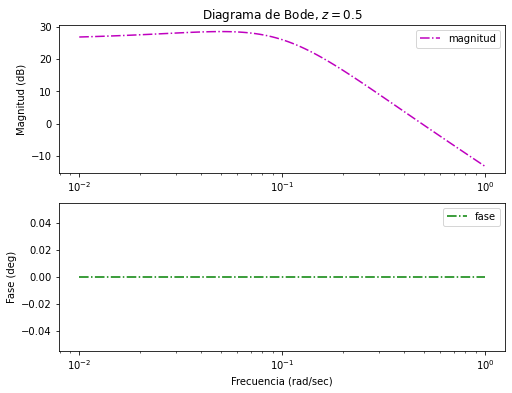

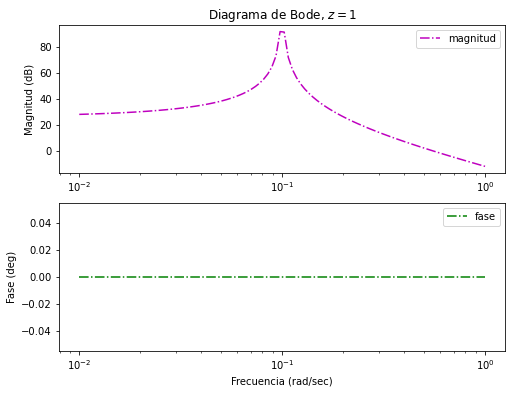

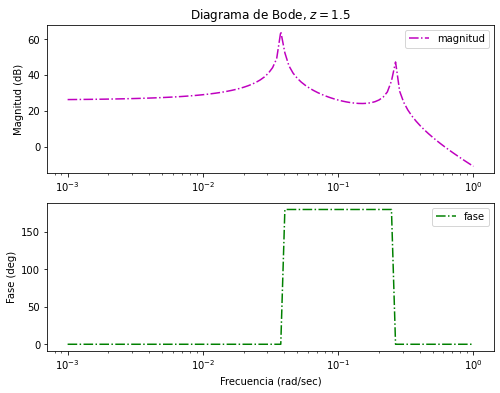

In [15]:
w_n=0.1
k=20

for z in [0.5,1,1.5]:
    
    funtran = signal.TransferFunction([k*w_n**2],[-1,2*z*1j*w_n,w_n**2]) 
    omega, mag, phase = signal.bode(funtran)

    fig, ax = plt.subplots(2, 1,figsize=(8,6))
    ax[0].semilogx(omega, mag, 'm-.',  label='magnitud')
    ax[1].semilogx(omega, phase, 'g-.',  label='fase')
    ax[0].set_title(f'Diagrama de Bode, $z= {z} $')
    ax[0].legend()
    ax[0].set_ylabel('Magnitud (dB)')
    ax[1].legend()
    ax[1].set_ylabel('Fase (deg)')
    ax[1].set_xlabel('Frecuencia (rad/sec)')

De las gráficas podemos extraer lo siguiente:

- Para z = 0.5 el filtro será del tipo Low-Pass.
- Para z = 1 el filtro será del tipo Band-Pass.
- Para z = 1.5 el filtro será del tipo Band-Pass.

EJERCICIO 5 - DISEÑOS DE FILTROS
------------

1.- Grafique la primera parte del Diagrama de Boid para diferentes valores de n.

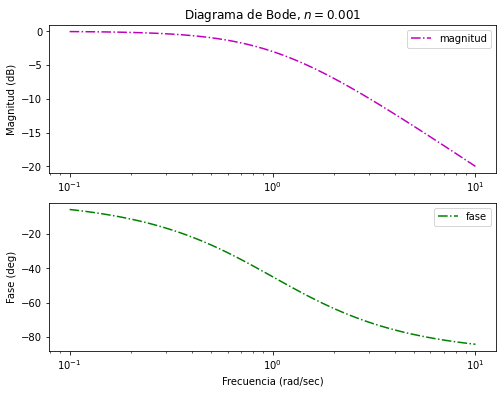

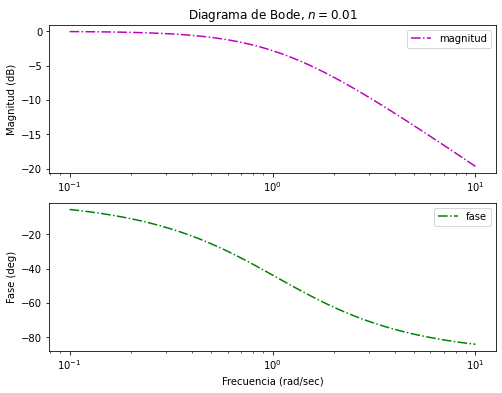

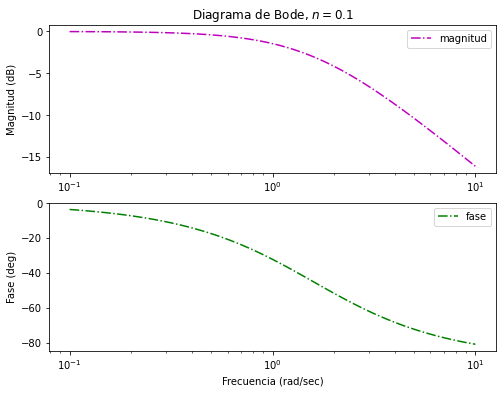

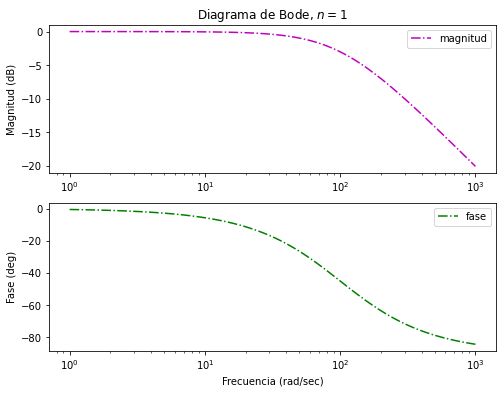

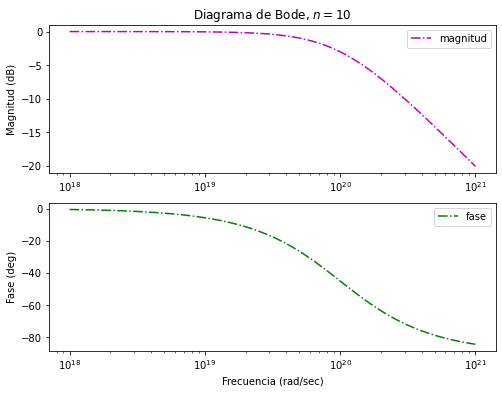

In [16]:
w_c=10

for n in [0.001,0.01,0.1,1,10]:
    
    funtran = signal.TransferFunction([1],[(1/w_c)**(2*n),1])
    w, mag, phase = signal.bode(funtran)

    fig, ax = plt.subplots(2, 1,figsize=(8,6))
    ax[0].semilogx(w, mag, 'm-.',  label='magnitud')
    ax[1].semilogx(w, phase, 'g-.',  label='fase')
    ax[0].set_title(f'Diagrama de Bode, $n= {n} $')
    ax[0].legend()
    ax[0].set_ylabel('Magnitud (dB)')
    ax[1].legend()
    ax[1].set_ylabel('Fase (deg)')
    ax[1].set_xlabel('Frecuencia (rad/sec)')